# 3.7 Weight Decay

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import d2l.torch as d2l

## 1. Experiment with the value of $\lambda$ in the estimation problem in this section. Plot training and validation accuracy as a function of $\lambda$. What do you observe?

In [70]:
seed = 3
np.random.seed(seed)
torch.manual_seed(seed)
#----- Define the WeightDecay Model -----#
class WeightDecay(d2l.LinearRegression):
    def __init__(self, lamda, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        # self.lamda = lamda  # coefficient of L2 regularization term
        self.training_loss_list = []
        self.validation_loss_list = []
    
    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, "weight_decay": self.lamda},
            {'params': self.net.bias}], lr=self.lr)

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.training_loss_list.append(l.item())
        # self.plot('loss', l, train=True)
        return l
    
    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.validation_loss_list.append(l.item())
        # self.plot('loss', l, train=False)
#----- Train the model with different lamda -----#
training_loss_list = []
validation_loss_list = []
lamda_list = [0, 0.5, 1, 3]
for lamda in lamda_list:
    model = WeightDecay(lamda=lamda, lr=0.01)
    data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, num_train=32, num_val=100)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    training_loss_list.append(np.mean(model.training_loss_list))
    validation_loss_list.append(np.mean(model.validation_loss_list))


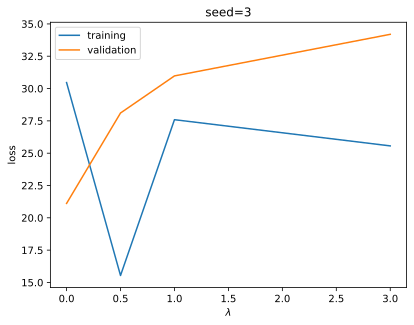

In [71]:
#----- Plot the training and validation loss -----#
plt.plot(lamda_list, training_loss_list, label='training')
plt.plot(lamda_list, validation_loss_list, label='validation')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('loss')
plt.title("seed={}".format(seed))
plt.savefig("3p7_1_seed={}.png".format(seed))
plt.show()

You can see the results with different seeds(3p7_1_seed=*.png). And as we can see, for most of the results, the validation loss has the process of declining, which means the regularization works to some extent.

## 2. Use a validation set to find the optimal value of $\lambda$. Is it really the optimal value? Does this matter?

Referring to Q1, for the seed of 0, the optimal value of $\lambda$ can be seen close to 1.0. 

However, this may be just the local optimum of the whole set of $\lambda$, because we didn't consider the results for $\lambda>6$ and the precision of current $\lambda$ is not so high. Nonethless, the optimal value of $\lambda$ doesn't matter, I think. We just need the regularization to mitigate the overfitting. A value that can make the regularization work is enough.

## 3. What would the update equations look like if instead of $\|\mathbf{w}\|^2$ we used $\sum_i |w_i|$ as our penalty of choice ($\ell_1$ regularization)?

If we use $||\mathbf{w}||$ as our penalty, the loss term will be:
$$
L=L(\mathbf{w},b)+\lambda ||\mathbf{w}||_1
$$
The update formula will be (for single-output linear regression):
$$
\mathbf{w} \leftarrow \mathbf{w}-\eta\lambda sgn(\mathbf{w}) - \frac{\eta}{|\mathcal{B}|} \sum_{i\in\mathcal{B}}\mathbf{x}^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)}+b-y^{(i)})
$$
where:
$$
sgn(w_i)=\begin{cases}1,&\text{if }w_i>0 \\ -1,&\text{if }w_i<0 \\ a,&a\in[-1,1] \text{, if }w_i=0 \end{cases}
$$

## 4. We know that $\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$. Can you find a similar equation for matrices (see the Frobenius norm)?

Assume that we have a matrix $W$, then the square of Frobenius norm $||W||_F^2$ is the sum of the diagonal in $W^TW$

## 5. Review the relationship between training error and generalization error. In addition to weight decay, increased training, and the use of a model of suitable complexity, what other ways might help us deal with overfitting?

## 6. In Bayesian statistics we use the product of prior and likelihood to arrive at a posterior via $P(w \mid x) \propto P(x \mid w) P(w)$. How can you identify $P(w)$ with regularization?